In [1]:
import matplotlib.pyplot as plt
import numpy as np
 

In [40]:
S = 5000 #размерность матрицы    
L = 40 # длина ящика для нулевых краевых условий
dx = L/(S+2)
x = np.linspace(-L/2+dx, L/2-dx, S) # список xi от -L/2+dx до L/2-dx
k = 1/(2*dx**2)
dx
# параметры графика
width = 7
high = 5
#h = 1, m = 1

In [18]:
# функция потенциала - гармонический осциллятор
def V(coor):
    return coor**2/2

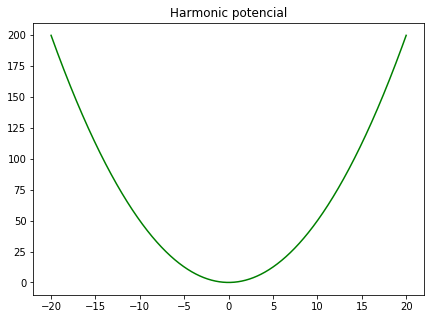

In [41]:
plt.figure(figsize=(width,high))
v = V(x)#*2*dx**2
plt.plot(x, v, color="green", label="V(x)")       
plt.title("Harmonic potencial")
plt.show()

# Блок 1. Нахождение собственных векторов и собственных значений матрицы гамильтониана

In [9]:
# построение матрицы Гамильтона
h = np.zeros((S,S))
for i in range(S-1):
    h[i+1][i] = -1*k
    h[i][i+1] = -1*k
for i in range(S):
    h[i][i] = 2*k + v[i]
#h[S-1][S-1]
print("1й, 2й и последний элементы диагонали:", h[0][0],h[1][1],h[-1][-1])

1й, 2й и последний элементы диагонали: 15837.342595948825 15837.182723878463 15837.342595948825


In [10]:
eigvals, eigvecs = np.linalg.eigh(h)

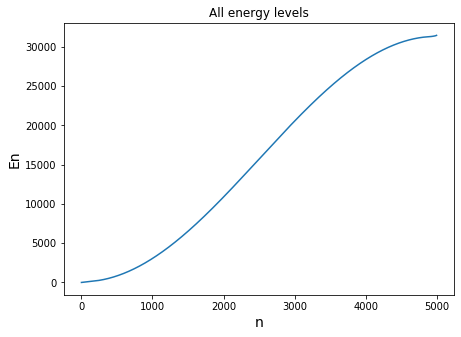

In [42]:
# построение зависимости энергии от номера уровня
# зависимость для всех уровней (необрезанная) довольно кривая
plt.figure(figsize=(width,high))
plt.plot(eigvals)
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.title("All energy levels")
plt.show()

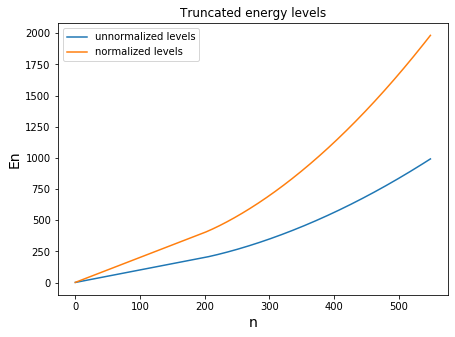

In [43]:
# построение зависимости энергии от номера уровня
n = 550 #номер последнего уровня
plt.figure(figsize=(width,high))
plt.plot(eigvals[:n], label = "unnormalized levels")
plt.plot(eigvals[:n]/eigvals[0], label = "normalized levels") #нормируем каждый уровень на первый
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("Truncated energy levels")
plt.show()
 

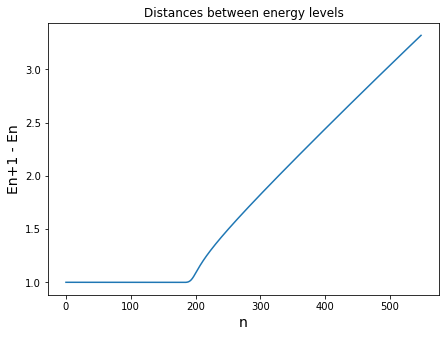

In [44]:
# изменяется приращение энергии?
vals =  eigvals[:n]
dist = [vals[i+1]-vals[i] for i in range(n-1)]
#dist
plt.figure(figsize=(width,high))
plt.plot(dist, label = "Distances between energy levels")
plt.xlabel("n",size=14)
plt.ylabel("En+1 - En",size=14)
plt.title("Distances between energy levels")
plt.show()
# вывод: нельзя брать уровни с n > точки перегиба

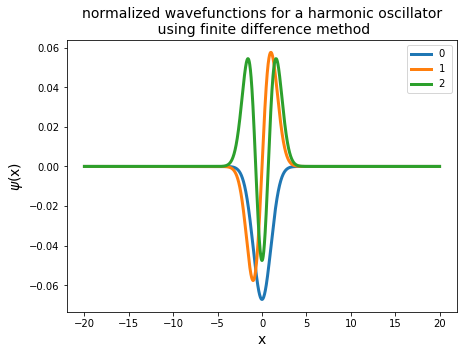

In [45]:
num = 3 #количество волновых функций на графике
plt.figure(figsize=(width,high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x, y,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('normalized wavefunctions for a harmonic oscillator\n using finite difference method',size=14)
plt.show()

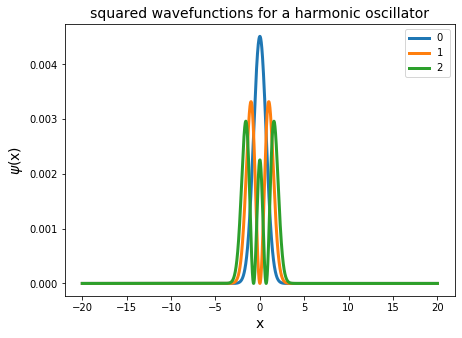

In [46]:
# несколько первых квадратов функций
num = 3
plt.figure(figsize=(width,high))
for i in range(num):
    y = []
    y = np.append(y,eigvecs[:,i])
#    y = np.append(y,0)
#    y = np.insert(y,0,0)
    plt.plot(x,y**2,lw=3, label="{} ".format(i))
    plt.xlabel('x', size=14)
    plt.ylabel('$\psi$(x)',size=14)
plt.legend()
plt.title('squared wavefunctions for a harmonic oscillator',size=14)
plt.show()

# Блок 2. Сравнение с аналитическим решением

Аналитические функции находятся по следующему алгоитму:
 <img src="harmonic_wavefunc.jpg">  

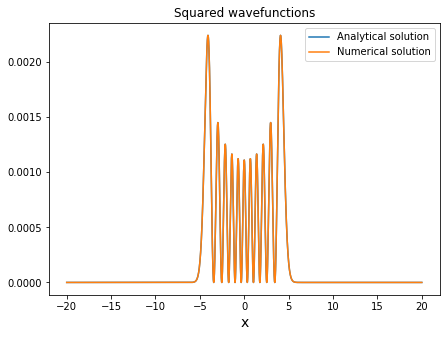

In [53]:
def harm_wave_func(n,x):
    if n == -1:
        return 0
    elif n == 0:
        return (np.pi)**(-1/4)*np.e**(-x**2/2)
    else:
        return np.sqrt(2/n)*x*harm_wave_func(n-1,x) - np.sqrt((n-1)/n)*harm_wave_func(n-2,x)
# сравниваются квадраты численной и аналитической функций       
curr = 10    
plt.figure(figsize=(width,high))
plt.plot(x,harm_wave_func(curr,x)**2*dx, label = "Analytical solution")  
plt.plot(x,eigvecs[:,curr]**2, label = "Numerical solution")
plt.xlabel('x', size=14)
plt.legend()
plt.title("Squared wavefunctions")
plt.show()
# графики полностью накладываются друг на друга, единственный минус в определении аналитической функции: 
# из-за реккурсии сложно посчититать уровни c n >> 1

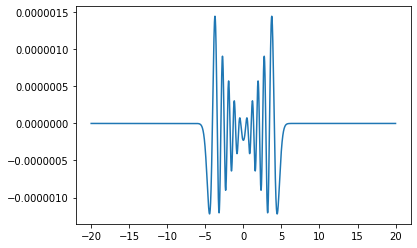

In [58]:
#разность между квадратами численной и аналитической функций

plt.plot(x,harm_wave_func(curr,x)**2*dx-eigvecs[:,curr]**2)  
plt.show()

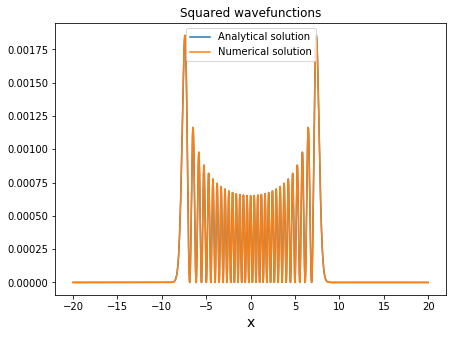

In [59]:
i = 30    
plt.figure(figsize=(width,high))
plt.plot(x,harm_wave_func(i,x)**2*dx, label = "Analytical solution".format(i))  
plt.plot(x,eigvecs[:,i]**2, label = "Numerical solution".format(i))
plt.xlabel('x', size=14)
plt.legend()
plt.title("Squared wavefunctions")
plt.show()

# Блок 3. Поиск матричных элементов